In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the file into df
df=pd.read_csv('avacado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

Dataset has 18249 rows and 14 columns

In [4]:
df.columns


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Observing the columns we can see that 'Unnamed: 0' is just the index.It can be removed. This project consists of two parts. In the first part 'AveragePrice'
is taken as target column and the rest as features. In the second part 'region' is taken as target column and the rest of the columns as features


In [5]:
#remove the column 'Unnamed: 0' from df
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


'Date' column is object type which has to be converted to datetime. Most of the other columns are float type. 'type' and 'region'
are categorical which are to be encoded.

Comparing the number of avacadoes sold/average price  year ,month and date wise would be very beneficial interms of analysis.For example 
sales can be higher during certain months.Price may also vary with demand and period.Extracting month and day from date column will be useful

In [8]:
#Check for null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no missing data

In [9]:
#Convert 'Date' column to datetime object
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [11]:
#Extract month and year from 'Date' column to separate columns
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

#Remove the 'Date' column
#df.drop(columns='Date',axis=1,inplace=True)


In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [13]:
#Check the unique values in 'type' and 'region'
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

There are two categories conventional and organic in 'type'

In [14]:
df['region'].nunique()

54

In [15]:
#Check the unique values in 'region'
df['region'].value_counts()

TotalUS                338
Louisville             338
Portland               338
NewYork                338
SouthCarolina          338
Midsouth               338
Detroit                338
Boston                 338
SanFrancisco           338
GrandRapids            338
Plains                 338
HartfordSpringfield    338
Jacksonville           338
Syracuse               338
Albany                 338
RichmondNorfolk        338
Philadelphia           338
Boise                  338
Spokane                338
PhoenixTucson          338
Pittsburgh             338
Seattle                338
CincinnatiDayton       338
Sacramento             338
Orlando                338
Chicago                338
West                   338
BuffaloRochester       338
RaleighGreensboro      338
Indianapolis           338
NewOrleansMobile       338
MiamiFtLauderdale      338
Southeast              338
Atlanta                338
Tampa                  338
StLouis                338
LosAngeles             338
H

The number of regions is 54 in number

In [16]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


Mean 'AveragePrice' is 1.406/avacado. Mean total volume of sales is around 8.51e+05.In terms of the three product labels mean sales 
of '4770' is slightly less than the other two.

Further I am not sure of the meaning of 'Small Bags','Large Bags','XLarge Bags'.Taking that they are the sizes of avocado,it is observed from the stats that mean sales of XLarge avocados is very less compared to small and large.Yield/Consumption of XLarge avocados might be very less.

# Data Visualisation

Distribution of columns
    

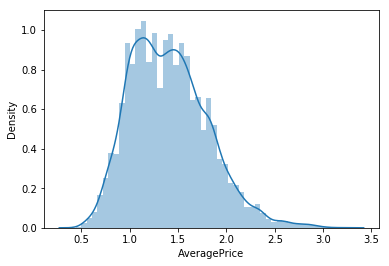

In [17]:
sns.distplot(df['AveragePrice'],kde=True)

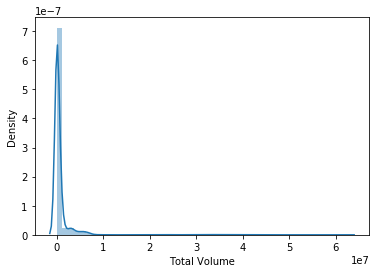

In [18]:
sns.distplot(df['Total Volume'],kde=True)

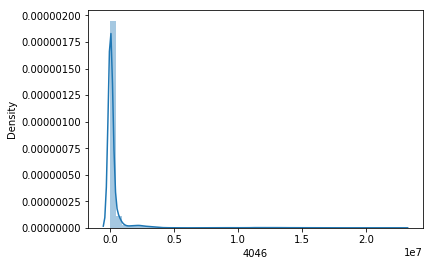

In [19]:
sns.distplot(df['4046'],kde=True)

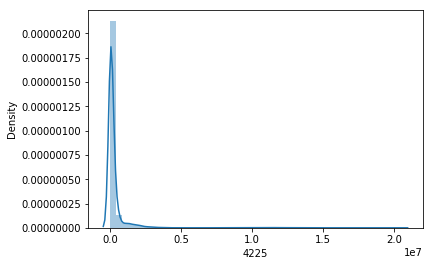

In [20]:
sns.distplot(df['4225'],kde=True)

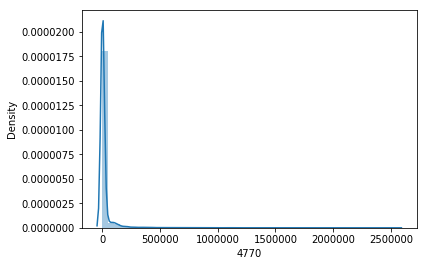

In [21]:
sns.distplot(df['4770'],kde=True)

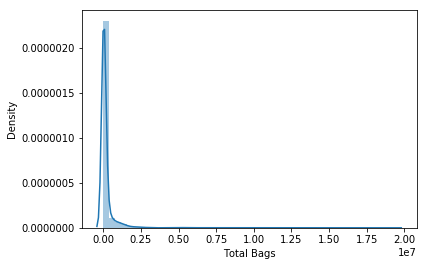

In [22]:
sns.distplot(df['Total Bags'],kde=True)

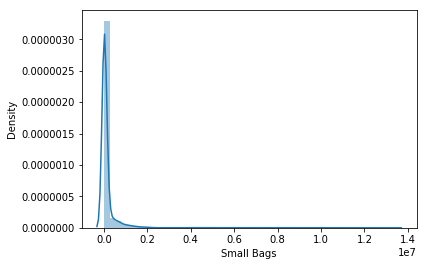

In [23]:
sns.distplot(df['Small Bags'],kde=True)

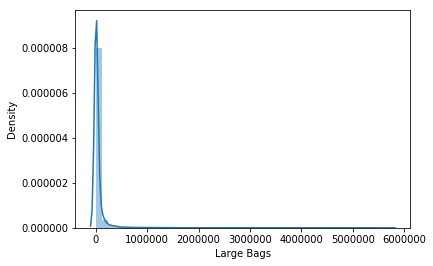

In [24]:
sns.distplot(df['Large Bags'],kde=True)

Relation between AveragePrice and Totalvolume

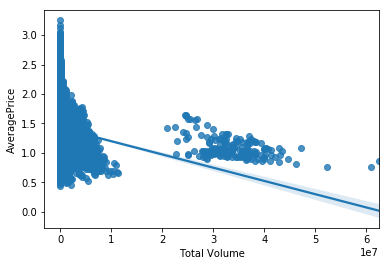

In [25]:
sns.regplot(data=df,x='Total Volume',y='AveragePrice')

There is no clear trend in the above plot.To some extent it can be seen that at lower ToatalVolume that is lower sales the price is high



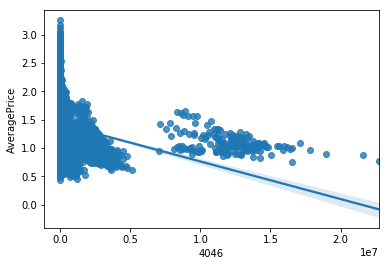

In [26]:
sns.regplot(data=df,x='4046',y='AveragePrice')

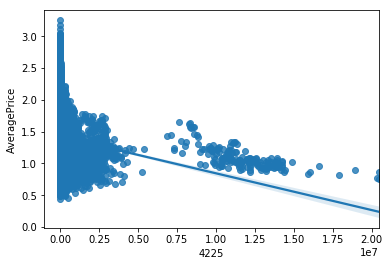

In [27]:
sns.regplot(data=df,x='4225',y='AveragePrice')

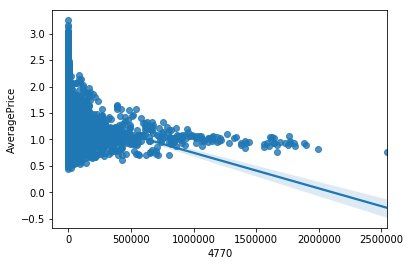

In [28]:
sns.regplot(data=df,x='4770',y='AveragePrice')

Same is the case with different productlabels sales. From all the four plots it can be seen that at lower sales the price is high.

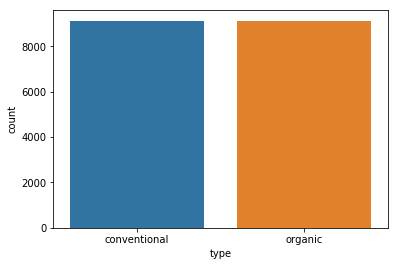

In [29]:
sns.countplot(df['type'])

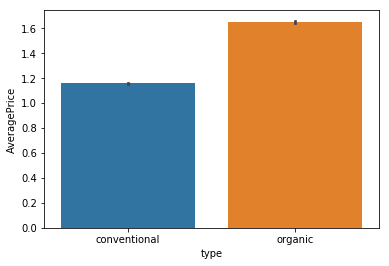

In [30]:
sns.barplot(data=df,x=df['type'],y=df['AveragePrice'])

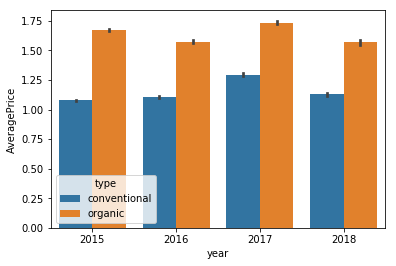

In [31]:
sns.barplot(data=df,x=df['year'],y=df['AveragePrice'],hue='type')

As can be seen from the above plots,dataset has sales data of both conventional and organic type. Average price of organic type is
observed to be more.

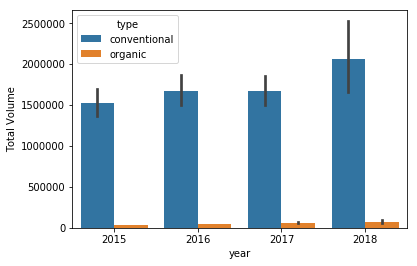

In [32]:
sns.barplot(data=df,x=df['year'],y=df['Total Volume'],hue='type')

As can be be seen from the plot, sales of conventional type is very high compared to organic in all years.

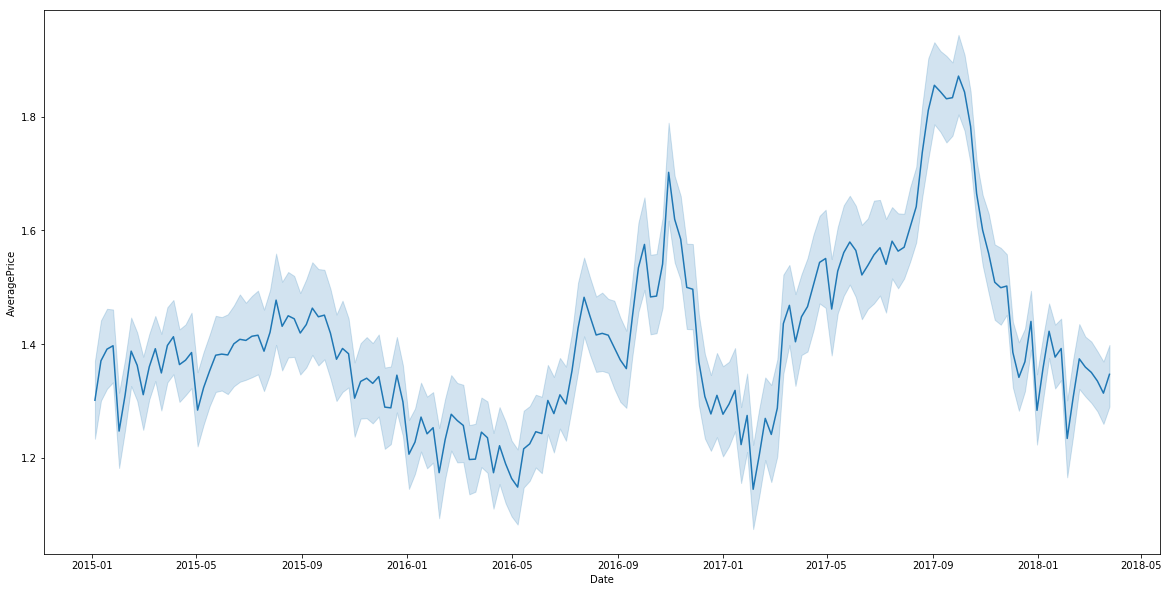

In [33]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='Date',y='AveragePrice')

It can be seen that over time there are fluctuations in price

In [34]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1,7


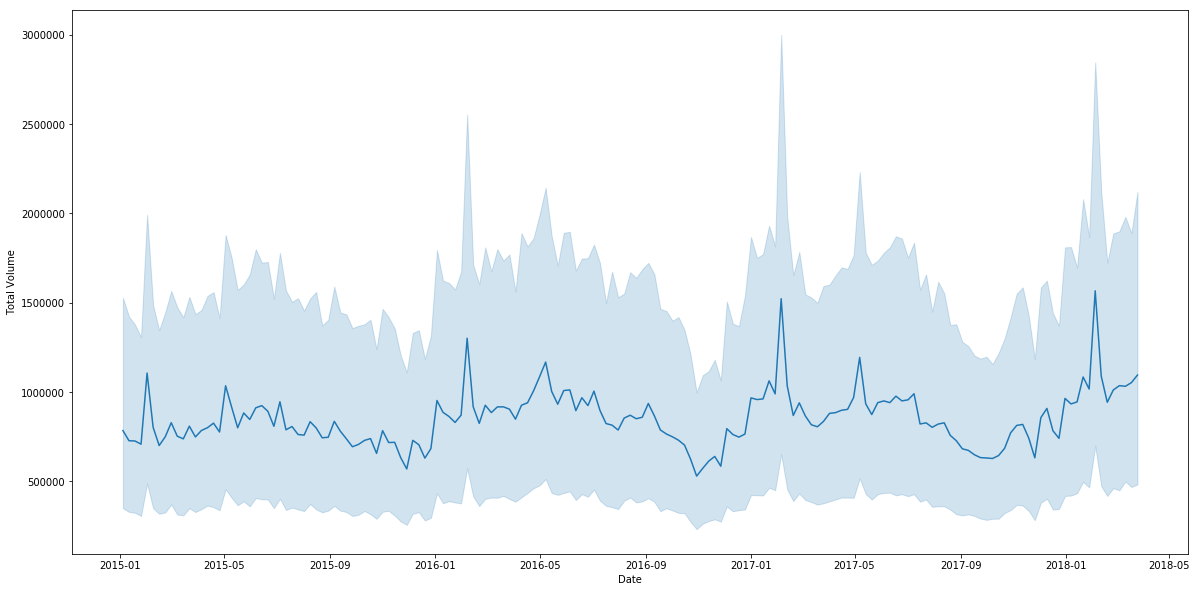

In [35]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='Date',y='Total Volume')

Same is the case with total volume i.e sales

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

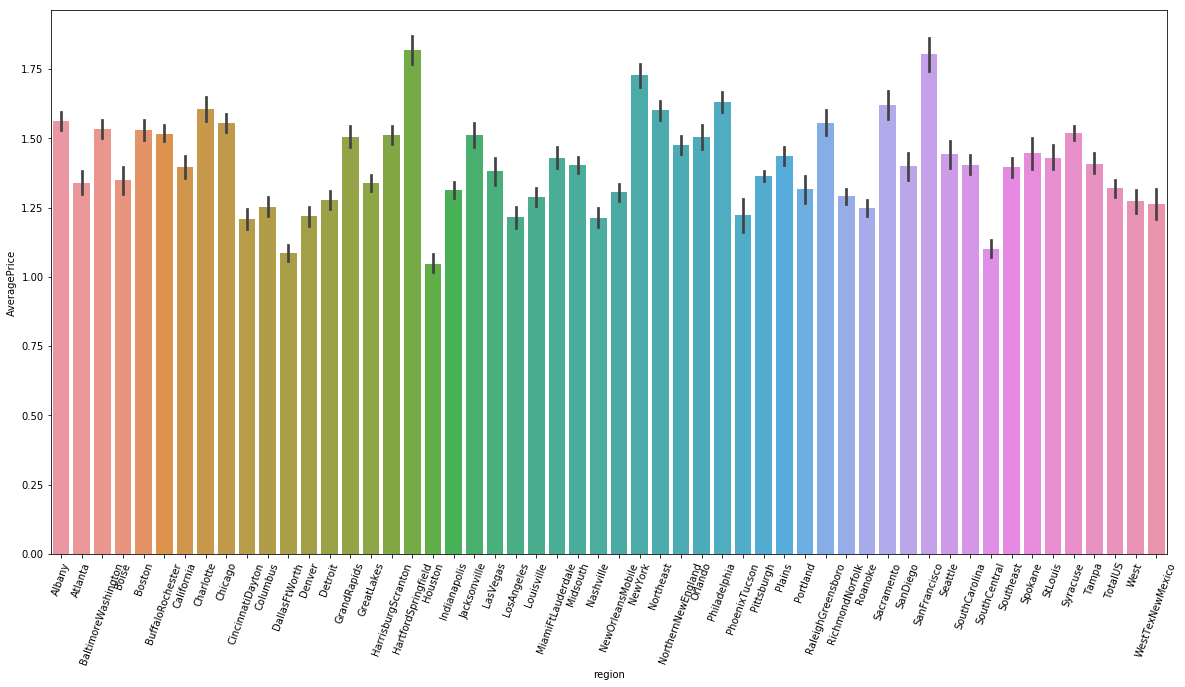

In [36]:
#Variation of price with region
plt.figure(figsize=(20,10))
sns.barplot(data=df,x=df['region'],y=df['AveragePrice'])
plt.xticks(rotation=70)

It can be seen that there is variation in price from region to region 

Checking for Outliers

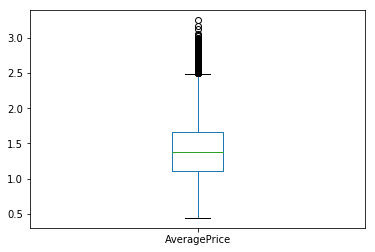

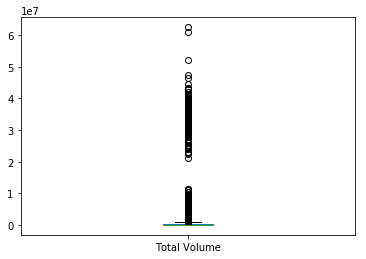

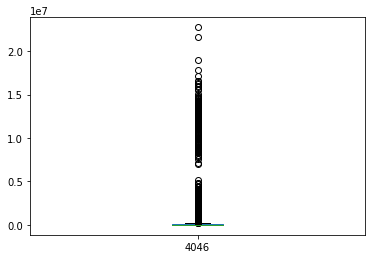

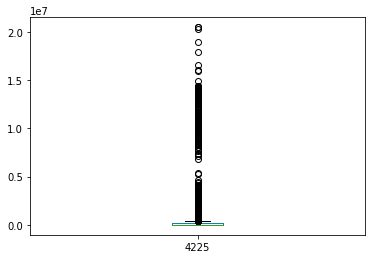

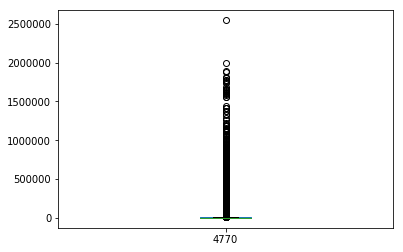

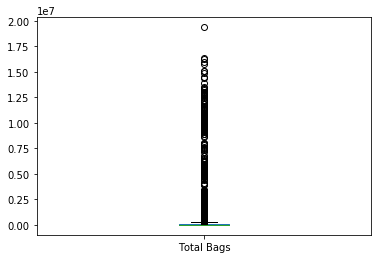

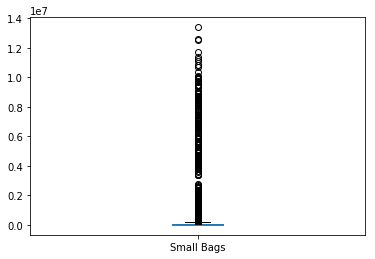

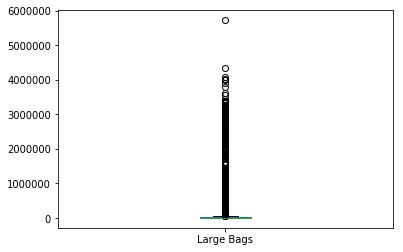

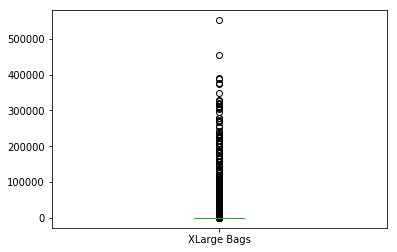

In [37]:
cols=['AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
for i in cols:
    plt.subplots()
    df[i].plot.box()


Many outliers can be seen in each of the columns

# Encoding

There are two object type columns 'region' and 'type' which are to be encoded

In [38]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in ['type','region']:
    df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [39]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11,29


# Outlier Removal

In [40]:
#'Date' column can be removed
df.drop(columns='Date',axis=1,inplace=True)


In [41]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11,29


In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [43]:
df.shape

(18249, 14)

In [44]:
df_new.shape

(17651, 14)

In [45]:
(18249-17651)/18249

0.03276891884486821

Data loss is 3% which is acceptable

# Checking Correlation

In [46]:
df_new.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,0.091704,-0.003242,0.149502,0.026819
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,-0.004866,0.076676,-0.018645,-0.006010
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,-0.034636,0.119067,-0.015797,-0.007401
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,-0.040234,0.011002,-0.019844,-0.009520
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.082054,-0.095972,-0.027245,0.000920
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.103442,0.085892,-0.010916,0.003311
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.086639,0.065976,-0.013018,0.005159
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.119543,0.127635,-0.001457,-0.004182
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,0.108209,-0.044338,0.002843,0.010532
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.003867,0.018409,-0.009499,-0.002287


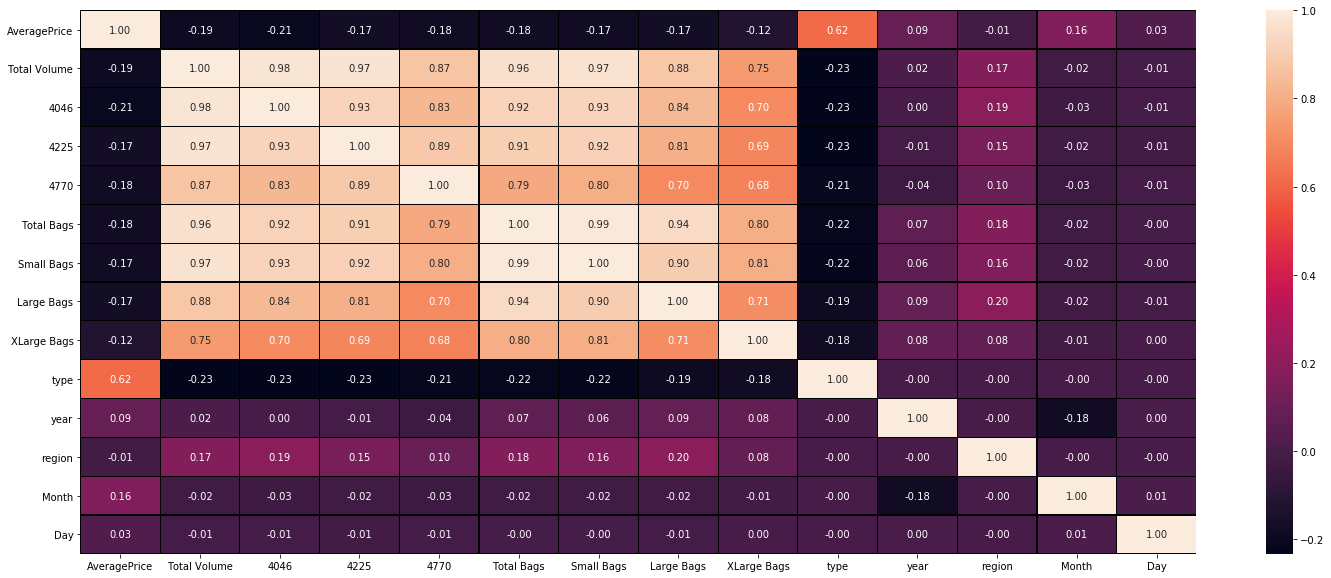

In [47]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='Black',fmt='0.2f')

As expected there is high correlation among the independent variables. This is evident as total volume should be sum of 4046,4225 and 4770.
Similarly total bags is sum of small bags, large bags and xlarge bags.

# Checking Skewness and Removal

In [48]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

Taking +/- 0.65 as threshold ,Columns 'Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' are skewed. This was also evident from distplots.

Let's try log transform on these columns


In [49]:
li=['Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
#for j in li:
#df_new[j]=np.log(df_new[j]+1)

In [50]:
#df_new.skew() 

Log transform didn't remove the skewness properly

In [51]:
df1=df_new.loc[:,li]

In [52]:
df1.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [53]:
col=df1.columns

In [54]:
from sklearn.preprocessing import power_transform
x=power_transform(df1,method='yeo-johnson')

In [55]:
df2=pd.DataFrame(x)
df2.columns=col

In [56]:
for k in li:
    df_new[k]=df2[k].values

In [57]:
df_new.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

Skewness is removed to large extent.

# Regression Problem- Take 'AveragePrice' as target column

In [162]:
#Split the dataframe to features and target
x=df_new.drop(columns='AveragePrice')
y=df_new['AveragePrice']

In [59]:
x.shape

(17651, 13)

In [60]:
y.shape

(17651,)

In [61]:
x.describe()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
count,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,1.765100e+04,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000
mean,8.442312e-16,-1.670464e-15,2.152799e-15,-8.323056e-15,-7.511601e-16,-3.786857e-16,5.724023e-15,3.875792e-14,0.509433,2016.137669,26.103110,6.178347,15.685400
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,0.499925,0.940239,15.396005,3.539935,8.775959
min,-2.992375e+00,-2.285118e+00,-2.583902e+00,-1.228986e+00,-3.515251e+00,-2.714256e+00,-1.624482e+00,-6.779191e-01,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,-8.941640e-01,-7.224171e-01,-7.264133e-01,-1.228986e+00,-7.807219e-01,-7.804145e-01,-7.385176e-01,-6.779191e-01,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.292258e-01,-5.631802e-02,6.417382e-02,8.028069e-02,1.422147e-01,9.758440e-02,7.274404e-02,-6.779191e-01,1.000000,2016.000000,26.000000,6.000000,16.000000
75%,7.627411e-01,8.015672e-01,7.229399e-01,9.223906e-01,6.474624e-01,6.502158e-01,7.537507e-01,1.278381e+00,1.000000,2017.000000,39.000000,9.000000,23.000000
max,2.226585e+00,2.300196e+00,2.498293e+00,1.889163e+00,2.590538e+00,2.706553e+00,2.352115e+00,1.717145e+00,1.000000,2018.000000,53.000000,12.000000,31.000000


Data is to be scaled.

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(x)

In [63]:
X=pd.DataFrame(X)

# Fitting Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)



In [113]:
lir=LinearRegression()
lir.fit(x_train,y_train)

LinearRegression()

In [114]:
lir.score(x_train,y_train)

0.5664456532136699

In [115]:
pred=lir.predict(x_test)

In [116]:
r2_score(y_test,pred)

0.5552130965799058

Cross validation of Linear Regression

In [117]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lir,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.21280887878644159 r2 score is 0.5552130965799058 and difference b/w thses two scores is  0.342


# Decision Tree Regression

In [118]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [119]:
pred=dtr.predict(x_test)

In [120]:
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.7416308281472331


In [121]:
cv_score=cross_val_score(dtr,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is -0.24508606217984008 r2 score is 0.7416308281472331 and difference b/w thses two scores is  0.987


# Random Forest Regression

In [122]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [123]:
pred=rfr.predict(x_test)

In [124]:
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.8841229560668584


In [126]:
cv_score=cross_val_score(rfr,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.20638253075152102 r2 score is 0.8841229560668584 and difference b/w thses two scores is  0.678


# Support Vector Regression

In [136]:
from sklearn.svm import SVR
svr_rbf=SVR(C=1.0,epsilon=0.2,kernel='rbf')

In [137]:
svr_rbf.fit(x_train,y_train)
pred=svr_rbf.predict(x_test)


In [138]:
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.765663709276887


In [139]:
cv_score=cross_val_score(svr_rbf,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.1481309683719302 r2 score is 0.765663709276887 and difference b/w thses two scores is  0.618


# KNeighbors Regressor

In [140]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)


KNeighborsRegressor()

In [141]:
pred=knr.predict(x_test)

In [142]:
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.7893656568854579


In [143]:
cv_score=cross_val_score(knr,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.0695400382614294 r2 score is 0.7893656568854579 and difference b/w thses two scores is  0.72


# Lasso,Ridge and Elastic Net

In [144]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5664356447994665

In [145]:
pred=ls.predict(x_test)

In [146]:
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.555192283661012


In [147]:
cv_score=cross_val_score(ls,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.2124830307127447 r2 score is 0.555192283661012 and difference b/w thses two scores is  0.343


In [148]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.566445653213666

In [149]:
pred=rd.predict(x_test)
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.5552130966445927


In [150]:
cv_score=cross_val_score(rd,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.21280887332045192 r2 score is 0.5552130966445927 and difference b/w thses two scores is  0.342


In [152]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.5664418556574715

In [153]:
enrpred=enr.predict(x_test)
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.5552130966445927


In [154]:
cv_score=cross_val_score(enr,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.21261190093541965 r2 score is 0.5552130966445927 and difference b/w thses two scores is  0.343


Observing the difference between r2_score and cross val score, least difference is with Linear Regression and Regularisation Techniques. Let us do hyper parameter 
tuning for the Lasso regression model.

# Hyper Parameter Tuning For Lasso regression

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [157]:
from sklearn.model_selection import GridSearchCV
parameters={'alpha':np.arange(0,1,0.01)}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
grid.fit(X,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])})
0.21280887878642246
0.0
{'alpha': 0.0}


GridsearchCv returned alpha=0 which means Linear Regression .So finally see the fit and metrics of linear regression

In [158]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
lir=LinearRegression()
lir.fit(x_train,y_train)
lir.score(x_train,y_train)

0.5664456532136699

In [159]:
pred=lir.predict(x_test)
r2_score(y_test,pred)

0.5552130965799058

In [160]:
cv_score=cross_val_score(lir,X,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred))

mean cv score is 0.21280887878644159 r2 score is 0.5552130965799058


# Saving the Model

In [161]:
import joblib
joblib.dump(lir,'lirfile.obj')
lir_from_joblib=joblib.load('lirfile.obj')
lir_from_joblib.predict(x_test)

array([0.96218882, 1.84008862, 1.2460182 , ..., 1.57614981, 1.13531539,
       1.64506434])

# Classification Problem- Take 'region' as target column

In [163]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,0.0,2015,0.0,12,27
1,1.35,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,0.0,2015,0.0,12,20
2,0.93,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,0.0,2015,0.0,12,13
3,1.08,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,0.0,2015,0.0,12,6
4,1.28,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,0.0,2015,0.0,11,29


In [164]:
x=df_new.drop(columns='region')
y=df_new['region']

# Scaling

In [169]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(x)
X=pd.DataFrame(X)

In [171]:
y.nunique()

54

In [170]:
y.value_counts()

39.0    338
30.0    338
2.0     338
4.0     338
8.0     338
12.0    338
16.0    338
32.0    338
38.0    338
9.0     338
26.0    338
44.0    338
19.0    338
5.0     338
13.0    338
10.0    338
34.0    338
11.0    338
35.0    338
23.0    338
18.0    338
27.0    338
0.0     338
49.0    338
20.0    337
1.0     337
28.0    337
14.0    336
40.0    336
50.0    336
41.0    336
33.0    336
24.0    335
31.0    335
48.0    333
21.0    333
25.0    333
53.0    332
7.0     332
22.0    331
17.0    331
36.0    330
3.0     329
37.0    328
47.0    328
43.0    326
29.0    325
46.0    307
42.0    301
45.0    292
6.0     290
15.0    272
52.0    256
51.0    169
Name: region, dtype: int64

No class imbalance in the target variable.

# Decision Tree Classifier

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=555)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

pred=dtc.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
confusion_matrix(y_test,pred)

accuracy score 0.792107250755287


array([[75,  0,  0, ...,  0,  0,  0],
       [ 0, 71,  0, ...,  0,  0,  1],
       [ 0,  0, 90, ...,  0,  0,  1],
       ...,
       [ 0,  0,  0, ..., 54,  0,  0],
       [ 0,  0,  0, ...,  0, 77,  0],
       [ 0,  0,  1, ...,  0,  0, 57]], dtype=int64)

Cross Validation

In [183]:
score=cross_val_score(dtc,X,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,pred)-score.mean(),3))


0.6071503100864677 difference b/w accuracy score and cv score is  0.185


# Naive-Baye's Classifier

There are negative values in the data and also there is strong dependence among the features. So Naive baye's Classifier is not suitable.


# KNN Classifier

In [185]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score 0.6401057401812689
[[81  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  0]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 56  0]
 [ 0  2  1 ...  0  0 48]]
              precision    recall  f1-score   support

         0.0       0.55      0.87      0.67        93
         1.0       0.34      0.54      0.41       105
         2.0       0.72      0.91      0.81       100
         3.0       0.61      0.55      0.58        97
         4.0       0.76      0.70      0.73       105
         5.0       0.51      0.51      0.51        97
         6.0       0.85      0.91      0.88        87
         7.0       0.51      0.78      0.61       105
         8.0       0.76      0.84      0.80       100
         9.0       0.49      0.58      0.53       106
        10.0       0.30      0.41      0.35        97
        11.0       0.58      0.78      0.67        93
        12.0       0.82      0.75      0.78       101
        13.0       0.55      0.50      0.52       104

Cross Validation

In [186]:
score=cross_val_score(knn,X,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,predknn)-score.mean(),3))


0.45780917964393353 difference b/w accuracy score and cv score is  0.182


# Support Vector Machine Classifier

In [187]:
from sklearn.svm import SVC
svcp=SVC(kernel='poly')
svcp.fit(x_train,y_train)
svcp.score(x_train,y_train)
predsvcp=svcp.predict(x_test)
print('accuracy_score',accuracy_score(y_test,predsvcp))
print(confusion_matrix(y_test,predsvcp))
print(classification_report(y_test,predsvcp))

accuracy_score 0.6867447129909365
[[87  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 88 ...  0  0  0]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  8  0 ...  0  0 46]]
              precision    recall  f1-score   support

         0.0       0.56      0.94      0.70        93
         1.0       0.37      0.61      0.46       105
         2.0       0.90      0.88      0.89       100
         3.0       0.83      0.57      0.67        97
         4.0       0.84      0.78      0.81       105
         5.0       0.69      0.61      0.64        97
         6.0       0.94      0.85      0.89        87
         7.0       0.67      0.51      0.58       105
         8.0       0.98      1.00      0.99       100
         9.0       0.70      0.67      0.68       106
        10.0       0.47      0.52      0.49        97
        11.0       0.78      0.88      0.83        93
        12.0       0.74      0.81      0.77       101
        13.0       0.40      0.49      0.44       104

Cross Validation

In [188]:
score=cross_val_score(svcp,X,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,predsvcp)-score.mean(),3))


0.5231367905054428 difference b/w accuracy score and cv score is  0.164


# Random forest Classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.9031344410876133
[[87  0  0 ...  0  0  0]
 [ 0 87  0 ...  0  0  0]
 [ 0  0 99 ...  0  0  0]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 77  0]
 [ 0  2  1 ...  0  0 79]]
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        93
         1.0       0.78      0.83      0.81       105
         2.0       0.96      0.99      0.98       100
         3.0       0.93      0.84      0.88        97
         4.0       0.93      0.95      0.94       105
         5.0       0.90      0.80      0.85        97
         6.0       0.97      0.97      0.97        87
         7.0       0.89      0.90      0.89       105
         8.0       0.98      0.99      0.99       100
         9.0       0.91      0.87      0.89       106
        10.0       0.82      0.82      0.82        97
        11.0       0.93      0.97      0.95        93
        12.0       0.95      0.95      0.95       101
        13.0       0.90      0.79      0.84       104
        14.0  

In [192]:
score=cross_val_score(rf,X,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,predrf)-score.mean(),3))


0.7611348041199169 difference b/w accuracy score and cv score is  0.142


# Boosting in Ensemble Methods

In [193]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))    

0.050981873111782476
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ... 23  0  0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        93
         1.0       0.00      0.00      0.00       105
         2.0       0.00      0.00      0.00       100
         3.0       0.00      0.00      0.00        97
         4.0       0.00      0.00      0.00       105
         5.0       0.00      0.00      0.00        97
         6.0       0.03      0.30      0.05        87
         7.0       0.00      0.00      0.00       105
         8.0       0.00      0.00      0.00       100
         9.0       0.00      0.00      0.00       106
        10.0       0.00      0.00      0.00        97
        11.0       0.00      0.00      0.00        93
        12.0       0.00      0.00      0.00       101
        13.0       0.00      0.00      0.00       104
        14.0

In [194]:
score=cross_val_score(ad,X,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,ad_pred)-score.mean(),3))


0.053824043747722664 difference b/w accuracy score and cv score is  -0.003


Though difference between scores is very less,accuracy is very less. So this model cannot be choosen.

Among the models Random Forest Classifier has least difference between accuracy and cv score. So let's choose Random Forest Classifier as the 
best model

# Hyper Parameter tuning for Random Forest Classifier

#List the parameters

In [199]:
params={'n_estimators':[100,400],'criterion':['gini','entropy'],'max_depth':[5,15,25,30],'min_samples_split':[2,4,6,8],
       'min_samples_leaf':[1,3,5]}
model=RandomForestClassifier()
grid=GridSearchCV(estimator=model,param_grid=params,cv=5)
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)


KeyboardInterrupt: 

In [201]:
from sklearn.model_selection import RandomizedSearchCV
random={'n_estimators':[100,200,400,600,800],'max_depth':[5,10,20,30,40],'min_samples_split':[2,4,6,8],
       'min_samples_leaf':[1,3,5]}
model=RandomForestClassifier()
gridr=RandomizedSearchCV(estimator=model,param_distributions=random,cv=5)
gridr.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)


KeyboardInterrupt: 

Tried Hyper Parameter Tuning with both Randomsearchcv and Gridsearchcv, couldn't achieve the tuning as the program run for very long time.

So Random Forest Classifier with default parameters is saved as final model

In [202]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.9059667673716012
[[87  0  0 ...  0  0  0]
 [ 0 90  0 ...  0  0  0]
 [ 0  0 99 ...  0  0  0]
 ...
 [ 0  0  0 ... 56  0  0]
 [ 0  0  0 ...  0 77  0]
 [ 0  3  1 ...  0  0 79]]
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89        93
         1.0       0.80      0.86      0.83       105
         2.0       0.97      0.99      0.98       100
         3.0       0.92      0.82      0.87        97
         4.0       0.91      0.96      0.94       105
         5.0       0.87      0.78      0.83        97
         6.0       0.98      0.97      0.97        87
         7.0       0.87      0.90      0.89       105
         8.0       0.99      1.00      1.00       100
         9.0       0.93      0.87      0.90       106
        10.0       0.80      0.85      0.82        97
        11.0       0.93      0.95      0.94        93
        12.0       0.95      0.94      0.95       101
        13.0       0.92      0.82      0.87       104
        14.0  

In [203]:
score=cross_val_score(rf,X,y,cv=8)
print(score.mean(),'difference b/w accuracy score and cv score is ',round(accuracy_score(y_test,predrf)-score.mean(),3))


0.7631744642551249 difference b/w accuracy score and cv score is  0.143


# Saving the Model

In [205]:
import joblib
joblib.dump(rf,'rffile.obj')
rf_from_joblib=joblib.load('rffile.obj')
rf_from_joblib.predict(x_test)

array([52., 48., 37., ..., 31., 49., 52.])

In [206]:
rf_from_joblib.score(x_test,y_test)

0.9059667673716012